# Scientific Computing Coursework

In [1]:
from My_Functions import solve_toEU,solve_toRK
import matplotlib.pyplot as plt
import numpy as np
import scipy

### Part 1: Initial Value problems
**Overview**: Numerical approximation methods are used to find approximate solutions to mathematical problems using numerical methods in situations where exact solutions may be difficult or impossible to find analytically. The methods work by discretising a continuous problem into a set of discrete values and applying algorithms to these values to approximate their solutions.

**Eulers Method**: Eulers method is a method used to approximate the solution of an ODE at discrete time intervals. I implemented Eulers Method using a combination of two functions. One function is a 'step' function, calculating the solution of the ODE at a time 'h' forwards in time from the initial provided solution. The second function uses a loop to iterate the step function between times 't1' to 't2'. The following example shows Eulers method approximating the solution to the equation: $$ {\ddot{x}} = x $$  Which is equivalent to the two-dimensional ODE: $$ {\dot{x}} = y $$ $$ {\dot{y}} = -x $$

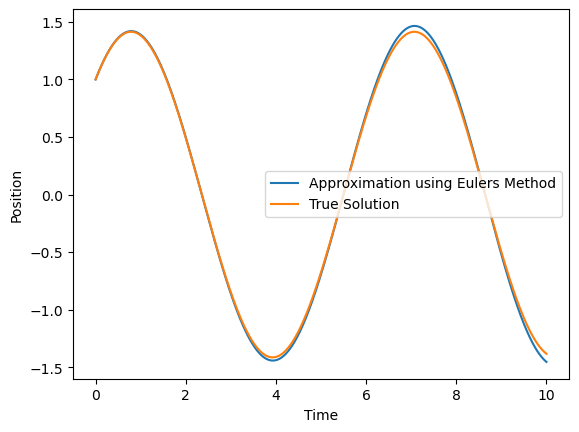

In [2]:
# Numerical approxmation
def ode(t,y): 
    dx_dt = y[1]
    dy_dt = -y[0]
    return [dx_dt, dy_dt]
x0 = [1,1]
t,x = solve_toEU(ode,x0,0,10,0.01)
plt.plot(t,x[:,0], label ='Approximation using Eulers Method')

# True solution
true_solution = x0[0]*np.cos(t) + x0[1]*np.sin(t)
plt.plot(t,true_solution, label ='True Solution')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()


**Discussion** 



Demonstrated by the plot above, the function provides an accurate approximation to the true solution provided the step size 'h' is small enough. As h increases, the accuracy of the approximation decreases significantly. To combat this issue i implemented a value error check that raises an error when the step size is larger than a specific value i'd deemed to be a good enough approximation. I implemented a multiple input checks into the function to eliminate any other issues the user may have when using the function, an example of this is demonstrated below, where the initial time input is a negative value:

In [3]:
solve_toEU(ode,x0,-1,10,0.01)

ValueError: Time must be a positive integer

**Limitations/Improvements**

The limitations of this method bla bla bla


Overall, I think my implementation of this method provides an intuitive solution to Eulers's method, which can be used to approximate solutions to ODEs with an aribtrary number of dimensions in a relatively fast period through the combination of numpy arrays and 'for' loops. The inputs to the function are concise and of an intuitive order, the documentation provides a clear demonstration of how to format the ODE the user would like approximated, and relevant checks are performed to provide the best approximation to the solution required.

**4th Order Runge-Kutta Method**: The Runge-Kutta method is another numerical approximation technique used to approximate the solutions of ODEs at discrete time intervals. The structure of my implementation of this method was similar to the 'solve_toEU' function, combining a step function and a function to iterate the each step through the time domain. Due to the RK method being of higher order than Eulers method, the local error is proportional to the step size raised to a higher power and is therefore generally more accurate at higher step sizes, demonstrated by the plot below:

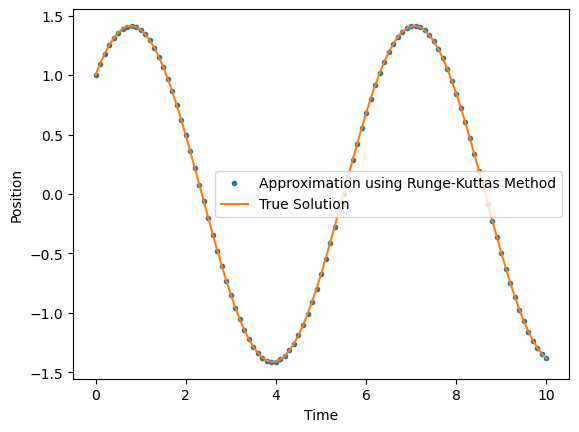

In [4]:
# Numerical approximation
x0 = [1,1]
t,x = solve_toRK(ode,x0,0,10,0.1)
plt.plot(t,x[:,0],'.', label ='Approximation using Runge-Kuttas Method')

# True solution
true_solution = x0[0]*np.cos(t) + x0[1]*np.sin(t)
plt.plot(t,true_solution, label ='True Solution')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

**Discussion**

Comparing the two numerical approximations provides interesting insight into the nature of each method. Even at a step size ten times larger than the one used in the Eulers approximation, RK4 demonstrates almost an exact approximation to the true solution. I implemented the same checks used in the afformentioned method, but increased the step size threshold. The RK method is computationally more expensive than Eulers method, therefore at equivalent step sizes the runtime of RK4 is greater than Eulers method; by increasing the step size threshold it decreased the number of iterations the method completes, thus decreasing runtime.

The graph below compares the error of each method at specific step sizes for the equation: $$ y = e^t $$

The use of numpy arrays and arithmetic for both implemented methods mean that they work for an arbitrary number of dimensions. The following example, the 'Lorenz' equations, are a 3D system forming a very simple model of water starting to boil in a pot exhibiting the approximations' ability to cater for more than 2 dimensions:
$$
\begin{aligned}
\frac{dx}{dt} &= \sigma(y-x) \\
\frac{dy}{dt} &= x(\rho-z)-y \\
\frac{dz}{dt} &= xy-\beta z
\end{aligned}
$$

/var/folders/y0/lzcwxhw925x7sff25d58p10m0000gn/T/ipykernel_18845/2103002133.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


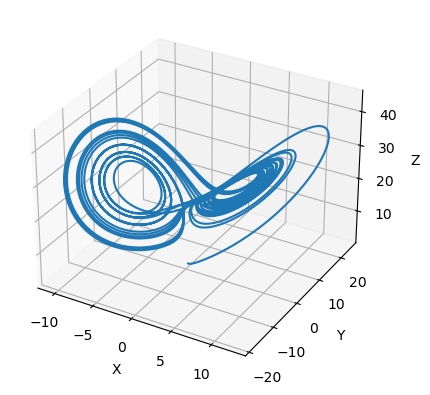

In [5]:
def Lorenz(t,xyz,s,r,b):
    x,y,z = xyz
    dx_dt = s*(y-x)
    dy_dt = r*x - y - x*z
    dz_dt = x*y - b*z
    return [dx_dt,dy_dt,dz_dt]

t,x= solve_toRK(Lorenz,[0,1,1.05],0,50,0.01,3,26.5,1)
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(x[:,0], x[:,1], x[:,2])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

### Part 2: Numerical Shooting
**Overview**: Numerical Shooting is a method for solving ODE boundary value problems. The purpose of the following Numerical Shooting code is to provide the user with the conditions that exhibit a periodic orbit for the ODE concerned.

My Numerical Shooting function takes the following inputs: An initial guess to the starting conditions of a periodic orbit, the ODE being solved, and any external arguments the ODE requires. This allows the user to easily alter any arbitrary values that may change the characteristics of any periodic orbits. To return the true values of the periodic orbit, I defined a function within the shooting function containing the appropriate phase conditions that a periodic orbit requires. This inner function is solved using scipy's 'root', and the corresponding values are returned to the user describing the starting conditions of the periodic orbit. The code below plots the solution of the 'Predator-Prey' model using the numerical approximation methods implemented in part 1:

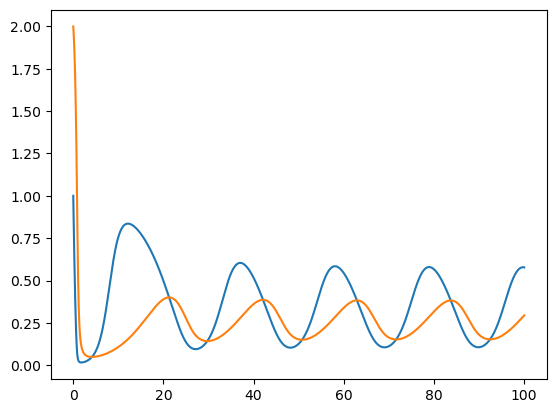

In [28]:
from My_Functions import shooting
from My_Functions import solve_to
def ode(t,y,a,b,d): 
    x = y[0]
    y = y[1]
    dx_dt = x*(1-x) - (a*x*y)/(d+x) 
    dy_dt = b*y*(1-(y/x))
    return [dx_dt, dy_dt] 
a = 1
b = 0.2
d = 0.1
x0 = [1,2]
t,x = solve_toRK(ode,x0,0,100,0.001,a,b,d)
plt.plot(t,x)
plt.show()

By varying the value of the 'b' parameter, the conditions for the periodic orbit change. A value for 'b' greater than 0.26 mean that the system never converges to a stable periodic orbit and therefore the conditions required for numerical shooting are never satisfied. I implemented a value check into the shooting function that raises an error when these conditions are not met to stop the function iterating forever. The period and initial values of the orbit displayed in the above figure are exhibited below using my 'shooting' function:

In [29]:
guess = [20,x0[0],x0[1]]
y = shooting(guess,ode,a,b,d)
print(y)

[20.8225888   0.58175574  0.28514042]


Using the values provided by the shooting function as initial conditions for our numerical approximation methods means we can plot the phase portrait of the limit cycle oscillation, exhibited below for the 'Predator-Prey' model:

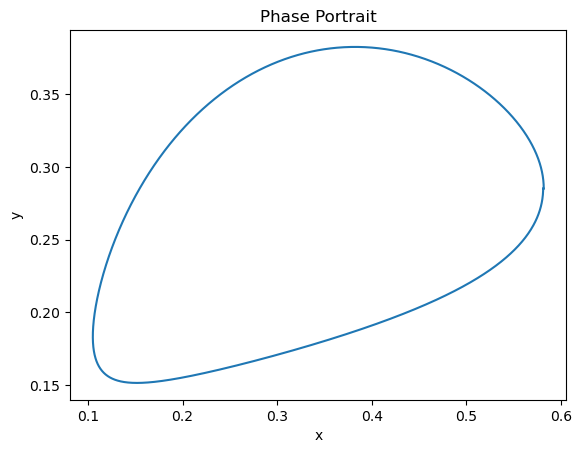

In [31]:
x0 = [y[1],y[2]]
t2 = y[0]
t,x = solve_toEU(ode,x0,0,t2,0.01,a,b,d)
plt.plot(x[:,0],x[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Portrait')
plt.show()

**Discussion**: My Numerical Shooting function provides an intuitive solution to determining the phase conditions for periodic orbit of arbitrary ODE's, providing a periodic orbit exists. The following design choices were made to maximise the intuitivity and flexibility of the function, whilst retaining accuracy and minimising computational expense. 
- Clear documentation describes the functions inputs, outputs and functionality making it's use easy for users to use the function.
- The use of nested functions makes the code more modular, and helps encapsulate the implementation details of the Numerical Shooting method.
- The function takes the '*args' parameter, increasing it's flexibility for handling multiple a wider range of differential equations.
- The function raises a ValueError if the method fails to find the initial values of the limit cycle. This helps to prevent the function from returning incorrect results or crashing if the input parameters are invalid.
- The function uses the solve_ivp function from the SciPy library, rather than the approximate methods defined in part 1 to numerically solve the differential equation. This makes it possible to find the limit cycle of nonlinear and complex systems that cannot be solved analytically.
- The use of numpy arrays means that an arbitrary number of dimensions can be solved for.

These design choices help make the function more robust, modular and flexible.

### Part 3: Numerical Continuation

**Overview**: Numerical Continuation methods are used to capture parameter dependent behavior. The resulting graphs produced describe the solution of the equation between a range of arbitrary parameter values, this can be a useful tool for determining bifurcation points and determining the stability of certain equilibria for example.

**Natural Parameter Continuation**: Natural parameter continuation is one of the simplest forms of Numerical Continuation, my Natural Parameter Continuation takes the following inputs. The function for which the user would like to study, an initial guess to the true solution, an initial parameter value and a final parameter value. The function returns the true solutions to the equation at the given parameter values, visualised below: 

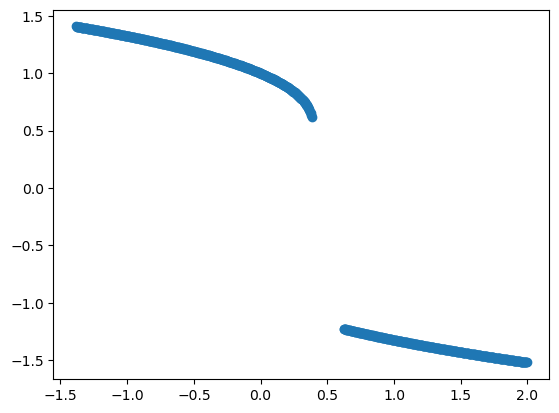

In [9]:
from My_Functions import NumCont, PseudoCont
def function(x,c):
    return x**3-x+c
x,y = NumCont(function,-10,-2,2)
plt.plot(x,y,'o')
plt.show()

This function works as it's intended to, by plotting the solution as points rather than a continuous line we can visualise the issue with the Natural Parameter Continuation algorithm. At folds in the solutions, the algorithm fails due to the search line failing to intersect with any nearby solution, thus the 'root' function does not converge and the solution is not added to the list of true solutions. An improvement of this method is to vary the parameter as the state vector changes.

**Psuedo-Arclength Continuation**: By varying the parameter as the state vector changes means we need to solve for both the solution, and the parameter value. To find the true solution, the function uses the same inputs as the previously explained function, but solves the augmented root-finding problem: $$ g(v) = \begin{bmatrix} f(v) \\ (v-\hat{\mathbf{v}}) \end{bmatrix} = 0 $$

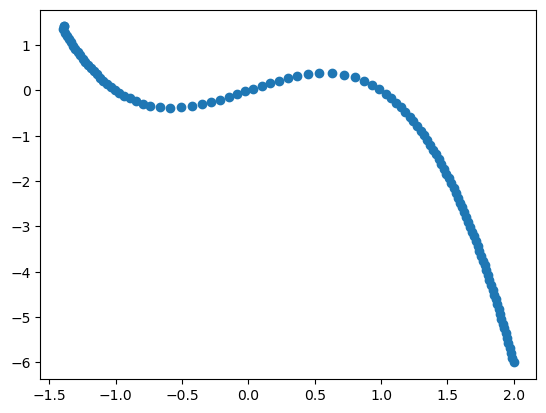

In [35]:
x,y = PseudoCont(function,-10,-2,2)
plt.plot(x,y,'o')
plt.show()

In a similar fashion to the Numerical Shooting function, I defined the augmented root finding function as a nested set of equations for which Scipy's 'root' solved. You can see that for the same equation that the Natural Parameter continuation tried to solve, the Pseudo-Arclength continuation function managed to capture the fold present in the bifurcation diagram. 

**Discussion**: 

### Part 4: Finite Difference Method


**Overview**: By discretising the domain of a PDE into a set of discrete points, we are able to transform a differential equation into a set of linear equations which we can solve numerically. 

My function for the Finite Difference 